# Gas Prices in Brazil

What can be done with this?
<br>How different regions of Brazil saw their gas prices change?
<br>Within a region, which states increased more their prices?
<br>Which states are the cheapest (or most expensive) for different types of fuels?

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv('2004-2019.csv', sep='\t',parse_dates=[1,2],index_col=0)

In [3]:
data.shape

(106823, 20)

In [4]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


First is to rename the column names back to English 

In [5]:
data.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
       'ANO'],
      dtype='object')

In [6]:
data.rename(columns={'DATA INICIAL':'date_first', 
                     'DATA FINAL':'date_last',
                     'REGIÃO':'macro_region',
                     'ESTADO':'state',
                     'PRODUTO':'product',
                     'NÚMERO DE POSTOS PESQUISADOS':'num_gas_station', 
                     'UNIDADE DE MEDIDA':'unit',
                     'PREÇO MÉDIO REVENDA':'mean_mkt_value',
                     'DESVIO PADRÃO REVENDA':'sd',
                     'PREÇO MÍNIMO REVENDA':'min_price',
                     'PREÇO MÁXIMO REVENDA':'max_price',
                     'MARGEM MÉDIA REVENDA':'mean_price_margin',
                     'COEF DE VARIAÇÃO REVENDA':'coef_var',
                     'PREÇO MÉDIO DISTRIBUIÇÃO':'mean_dist_price',
                     'DESVIO PADRÃO DISTRIBUIÇÃO':'dist_sd',
                     'PREÇO MÍNIMO DISTRIBUIÇÃO':'dist_min_price',
                     'PREÇO MÁXIMO DISTRIBUIÇÃO':'dist_max_price',
                     'COEF DE VARIAÇÃO DISTRIBUIÇÃO':'dist_coef_var',
                     'MÊS':'month',
                     'ANO':'year'}
            , inplace=True)

In [7]:
data.head()

,date_first,date_last,macro_region,state,product,num_gas_station,unit,mean_mkt_value,sd,min_price,max_price,mean_price_margin,coef_var,mean_dist_price,dist_sd,dist_min_price,dist_max_price,dist_coef_var,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


Next is to check the dataset. This includes data cleaning and reformating

In [8]:
for i in list(data.columns):
    print(i,len(set(data[i])))

date_first 785
date_last 785
macro_region 5
state 27
product 6
num_gas_station 2219
unit 3
mean_mkt_value 18612
sd 6341
min_price 2047
max_price 2078
mean_price_margin 11930
coef_var 210
mean_dist_price 15997
dist_sd 5858
dist_min_price 21620
dist_max_price 22576
dist_coef_var 397
month 12
year 16


So all columns have data variations. 

In [9]:
data.isnull().any()

date_first           False
date_last            False
macro_region         False
state                False
product              False
num_gas_station      False
unit                 False
mean_mkt_value       False
sd                   False
min_price            False
max_price            False
mean_price_margin    False
coef_var             False
mean_dist_price      False
dist_sd              False
dist_min_price       False
dist_max_price       False
dist_coef_var        False
month                False
year                 False
dtype: bool

There is no missing data in the dataset 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
date_first           106823 non-null datetime64[ns]
date_last            106823 non-null datetime64[ns]
macro_region         106823 non-null object
state                106823 non-null object
product              106823 non-null object
num_gas_station      106823 non-null int64
unit                 106823 non-null object
mean_mkt_value       106823 non-null float64
sd                   106823 non-null float64
min_price            106823 non-null float64
max_price            106823 non-null float64
mean_price_margin    106823 non-null object
coef_var             106823 non-null float64
mean_dist_price      106823 non-null object
dist_sd              106823 non-null object
dist_min_price       106823 non-null object
dist_max_price       106823 non-null object
dist_coef_var        106823 non-null object
month                106823 non-null int64
year                 106823 non-nu

There are some columns showing dtypes = object but they contain numerical values. Therefore it is necessary to change their dtypes back to float64

In [11]:
for col in ['mean_price_margin','mean_dist_price','dist_sd','dist_min_price','dist_max_price','dist_coef_var']:
    data[col]=pd.to_numeric(data[col],errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
date_first           106823 non-null datetime64[ns]
date_last            106823 non-null datetime64[ns]
macro_region         106823 non-null object
state                106823 non-null object
product              106823 non-null object
num_gas_station      106823 non-null int64
unit                 106823 non-null object
mean_mkt_value       106823 non-null float64
sd                   106823 non-null float64
min_price            106823 non-null float64
max_price            106823 non-null float64
mean_price_margin    103392 non-null float64
coef_var             106823 non-null float64
mean_dist_price      103423 non-null float64
dist_sd              103423 non-null float64
dist_min_price       103423 non-null float64
dist_max_price       103423 non-null float64
dist_coef_var        103423 non-null float64
month                106823 non-null int64
year                 106823 

Since modification is carried, check if any missing values again 

In [13]:
data.isnull().any()

date_first           False
date_last            False
macro_region         False
state                False
product              False
num_gas_station      False
unit                 False
mean_mkt_value       False
sd                   False
min_price            False
max_price            False
mean_price_margin     True
coef_var             False
mean_dist_price       True
dist_sd               True
dist_min_price        True
dist_max_price        True
dist_coef_var         True
month                False
year                 False
dtype: bool

So there are some missing values after conversion.
<br>Next is to check the number of missing records and determine if these records are removed or the whole columns is removed

In [14]:
data.isnull().sum()

date_first              0
date_last               0
macro_region            0
state                   0
product                 0
num_gas_station         0
unit                    0
mean_mkt_value          0
sd                      0
min_price               0
max_price               0
mean_price_margin    3431
coef_var                0
mean_dist_price      3400
dist_sd              3400
dist_min_price       3400
dist_max_price       3400
dist_coef_var        3400
month                   0
year                    0
dtype: int64

In [15]:
data.isnull().any(axis=1).sum()

3431

So there are in total around 3% of records with missing records. So it is safe to remove these row records without harming the overall dataset
<br>Next step is to remove rows with missing records 

In [16]:
data.dropna(inplace=True)

In [17]:
data.shape

(103392, 20)

There are 103392 records with 20 columns 

In [18]:
data.head()

,date_first,date_last,macro_region,state,product,num_gas_station,unit,mean_mkt_value,sd,min_price,max_price,mean_price_margin,coef_var,mean_dist_price,dist_sd,dist_min_price,dist_max_price,dist_coef_var,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


In [19]:
data.describe()

,num_gas_station,mean_mkt_value,sd,min_price,max_price,mean_price_margin,coef_var,mean_dist_price,dist_sd,dist_min_price,dist_max_price,dist_coef_var,month,year
count,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000
mean,240.511935,10.784472,0.652589,9.334931,12.458686,2.225151,0.045749,8.559322,0.559441,7.414814,9.805621,0.046640,6.485067,2011.737001
std,408.039174,17.685852,1.346422,15.024383,20.801190,4.375085,0.024488,13.603686,1.256914,11.681366,15.933999,0.042114,3.442155,4.410491
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000,1.000000,2004.000000
25%,47.000000,2.073000,0.073000,1.900000,2.330000,0.282000,0.030000,1.795000,0.047000,1.674400,1.945600,0.021000,4.000000,2008.000000
50%,108.000000,2.723000,0.115000,2.509000,3.000000,0.383000,0.042000,2.335000,0.077000,2.220000,2.507050,0.031000,6.000000,2012.000000
75%,251.000000,3.745000,0.190000,3.490000,4.150000,0.560000,0.058000,3.307000,0.151000,3.142800,3.520000,0.061000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.262000,83.137000,18.385000,83.000000,94.500000,0.780000,12.000000,2019.000000


Now is to answer questions 

### 1.How different regions of Brazil saw their gas prices change?

To show the prices change, first is to compare within the same product and the same unit
<br>Therefore first is to know possible sets for products and units 

In [20]:
set(zip(data['product'],data['unit']))

{('ETANOL HIDRATADO', 'R$/l'),
 ('GASOLINA COMUM', 'R$/l'),
 ('GLP', 'R$/13Kg'),
 ('GNV', 'R$/m3'),
 ('ÓLEO DIESEL', 'R$/l'),
 ('ÓLEO DIESEL S10', 'R$/l')}

Products determine unit.
<br>So we only need to consider products and then study the price changes

In [21]:
avg_price_by_prod_region = pd.pivot_table(data,index=['product','year'],columns='macro_region',values='mean_mkt_value',aggfunc=np.mean)
avg_price_by_prod_region.head()

macro_region           CENTRO OESTE  NORDESTE     NORTE   SUDESTE       SUL
product          year                                                      
ETANOL HIDRATADO 2004      1.502309  1.534441  1.736340  1.274912  1.396853
                 2005      1.630055  1.711411  1.900175  1.466315  1.611667
                 2006      1.880292  1.953212  2.171125  1.794656  1.880478
                 2007      1.597981  1.764425  1.948916  1.613649  1.638378
                 2008      1.634000  1.793338  1.988585  1.589534  1.628506

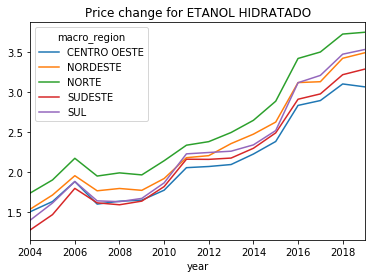

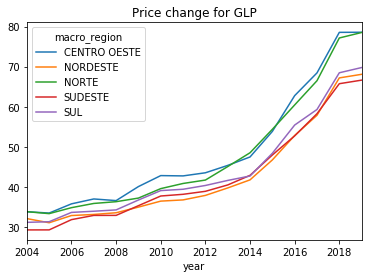

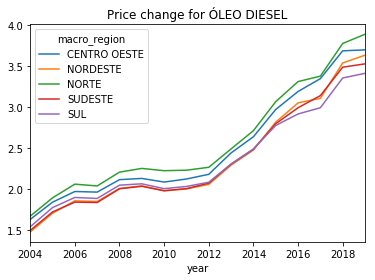

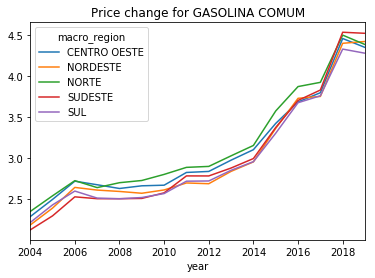

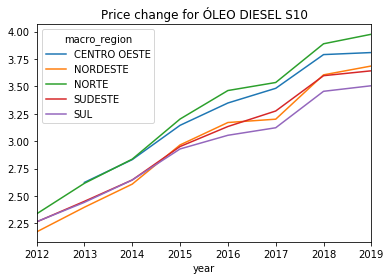

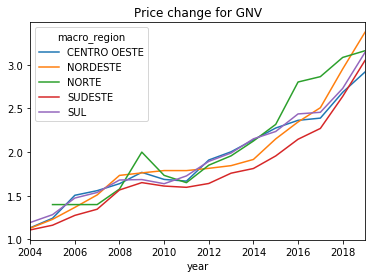

In [22]:
for i in set(avg_price_by_prod_region.index.get_level_values(0)):
    sub_table = avg_price_by_prod_region[avg_price_by_prod_region.index.get_level_values(0)==i].reset_index(drop=False)
    sub_table =avg_price_by_prod_region[avg_price_by_prod_region.index.get_level_values(0)==i].reset_index(drop=False)
    sub_table.drop('product',axis=1,inplace=True)
    sub_table.set_index('year').plot()
    plt.title('Price change for {}'.format(i))
    plt.show()

So all gas products raise prices. OLEO DIESEL is the most problematic as the increases are over 130% from 2004 to 2019

### 2. Within a region, which states increased more their prices? 

To answer this question, first is to calculate the increase (in %) for each product in each state within a region
<br>Then to calcuclate the average of increase to find the state with highest increase

In [23]:
avg_price_by_prod_region_states = pd.pivot_table(data,index=['macro_region','state','year'],columns='product',values='mean_mkt_value',aggfunc=np.mean)
avg_price_by_prod_region_states.head(10)

product                             ETANOL HIDRATADO  GASOLINA COMUM  \
macro_region state            year                                     
CENTRO OESTE DISTRITO FEDERAL 2004          1.554000        2.124676   
                              2005          1.667460        2.328860   
                              2006          1.903038        2.596887   
                              2007          1.695385        2.572481   
                              2008          1.829788        2.555269   
                              2009          1.844500        2.681580   
                              2010          2.022632        2.711458   
                              2011          2.203250        2.832115   
                              2012          2.264000        2.835887   
                              2013          2.278510        2.983731   

product                                   GLP  GNV  ÓLEO DIESEL  \
macro_region state            year                                
CENTRO OESTE DISTRITO FEDERAL 2004  33.357147  NaN     1.558706   
                              2005  33.548750  NaN     1.752420   
                              2006  35.575804  NaN     1.879302   
                              2007  37.694019  NaN     1.871712   
                              2008  36.975442  NaN     2.015212   
                              2009  38.566658  NaN     2.025840   
                              2010  40.086686  NaN     2.024750   
                              2011  37.313255  NaN     2.069212   
                              2012  37.415568  NaN     2.073792   
                              2013  41.403173  NaN     2.394615   

product                             ÓLEO DIESEL S10  
macro_region state            year                   
CENTRO OESTE DISTRITO FEDERAL 2004              NaN  
                              2005              NaN  
                              2006              NaN  
                              2007              NaN  
                              2008              NaN  
                              2009              NaN  
                              2010              NaN  
                              2011              NaN  
                              2012              NaN  
                              2013         2.605556

In [24]:
avg_price_by_prod_region_states.reset_index(drop=False,inplace=True)

In [25]:
price_increase = {}

for state in set(data['state']):
    for prod in set(data['product']):
        pct_change = []
        price_list = avg_price_by_prod_region_states[avg_price_by_prod_region_states['state']==state][prod]
        price_list = price_list[~np.isnan(price_list)]
        pct_change.append(price_list.pct_change().mean())
    price_increase[state] = np.mean(pct_change)

In [26]:
price_increase_df = pd.DataFrame.from_dict(price_increase,orient ='index')
price_increase_df.reset_index(drop=False,inplace=True)
price_increase_df.columns=['state','price_increase']

In [34]:
region_state = pd.DataFrame(set(zip(data['state'],data['macro_region'])),columns=['state','region'])

In [28]:
price_increase_result = pd.merge(price_increase_df,region_state,left_on='state',right_on='state')

In [29]:
price_increase_result.sort_values('price_increase',ascending=False).drop_duplicates(['region'])

,state,price_increase,region
17,PIAUI,0.128663,NORDESTE
11,MINAS GERAIS,0.077546,SUDESTE
19,RIO GRANDE DO SUL,0.074582,SUL
3,MATO GROSSO,0.069920,CENTRO OESTE
18,AMAZONAS,0.066750,NORTE


Above table shows the state in each region with the highest average price increase for overall products

### 3. Which states are the cheapest (or most expensive) for different types of fuels?

In [30]:
avg_price_ovreall_by_prod_state = pd.pivot_table(data,index=['state'],columns='product',values='mean_mkt_value',aggfunc=np.mean)

In [31]:
avg_price_ovreall_by_prod_state.head()

product,ETANOL HIDRATADO,GASOLINA COMUM,GLP,GNV,ÓLEO DIESEL,ÓLEO DIESEL S10
state,,,,,,
ACRE,2.681673,3.413656,49.484349,NaN,2.880958,3.657033
ALAGOAS,2.354700,3.111782,40.426326,1.873809,2.352431,3.054390
AMAPA,2.272836,2.993395,48.540638,1.598000,2.580703,3.705006
AMAZONAS,2.411441,3.050145,41.060679,2.088411,2.467423,3.144564
BAHIA,2.253722,3.059354,40.309791,1.849818,2.311694,3.020062


In [32]:
avg_price_ovreall_by_prod_state.idxmax()

product
ETANOL HIDRATADO             RORAIMA
GASOLINA COMUM                  ACRE
GLP                      MATO GROSSO
GNV                 DISTRITO FEDERAL
ÓLEO DIESEL                     ACRE
ÓLEO DIESEL S10                AMAPA
dtype: object

In [33]:
avg_price_ovreall_by_prod_state.idxmin()

product
ETANOL HIDRATADO     SAO PAULO
GASOLINA COMUM       SAO PAULO
GLP                 PERNAMBUCO
GNV                      PIAUI
ÓLEO DIESEL             PARANA
ÓLEO DIESEL S10         PARANA
dtype: object

Sao Paulo and Parana are good places for cheap fuels 